# Bibliotekos

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import os
os.getcwd()

'C:\\Users\\PC\\Desktop\\AAI labs'

# Duomenu nuskaitymas

In [3]:
# Duomenu nuskaitymas
file = "WEOOct2020all.csv.csv"
df=pd.read_csv(file, sep=";", encoding='cp1252')
df.columns = df.columns.str.replace(' ', '_') # Tarpus stulpeliuose pakeiciame i _

# Visus metu objektus paverteme i str, panaikinome kablelius, tuscius objektus paverteme i None ir paverteme i float type
for i in range(9,len(df.columns)):
        df[df.columns[i]]=df[df.columns[i]].astype(str).str.replace(',','').replace('--',None).astype(float) 

# Pokytis GDP per capita tarp 2020 ir 2019

In [4]:
df['%GDP_per_capita_2020']=((df[df.WEO_Subject_Code=='NGDPDPC']['2020']-df[df.WEO_Subject_Code=='NGDPDPC']['2019'])/
                            df[df.WEO_Subject_Code=='NGDPDPC']['2019'])*100

# Randame TOP 10 GDP per capita  saliu pokyciu tarp 2019 ir 2020
GDP_max=df[df.WEO_Subject_Code=='NGDPDPC'].sort_values(by='%GDP_per_capita_2020', ascending=False).head(10)
print('Top 10 saliu pagal GDP per capita procentinis pokytis tarp 2019 2020: {} '
      .format(GDP_max.loc[:,['Country','%GDP_per_capita_2020']]))

Top 10 saliu pagal GDP per capita procentinis pokytis tarp 2019 2020:                        Country  %GDP_per_capita_2020
3159                    Guyana             31.150352
2259                     Egypt             17.002504
7794               Timor-Leste             16.258511
4644                    Malawi              5.659483
8064              Turkmenistan              4.530237
7614  Taiwan Province of China              4.007449
594                 Bangladesh              3.961322
3924                     Kenya              3.532344
3519  Islamic Republic of Iran              3.526325
5454                     Nepal              3.430605 


# OECD saliu populiacijos augimas per paskutini desimtmeti

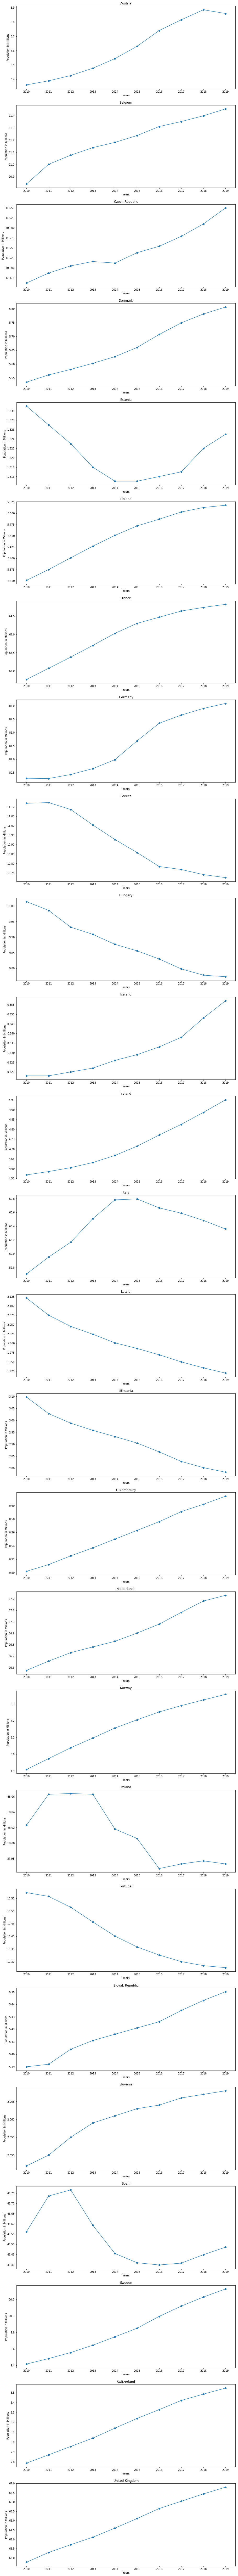

In [5]:
# OECD saliu sarasas
OECD = ["Austria", "Belgium", "Czech Republic", "Denmark", "Estonia",
        "Finland", "France", "Germany", "Greece", "Hungary", "Iceland",
        "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands",
        "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain",
        "Sweden", "Switzerland", "United Kingdom"]

# Apsibreziame objektus pagal populiacija
df_pop=df[df.WEO_Subject_Code=='LP']

# Gavome array tik is metu, float tipo duomenys
df_years=df.copy()
for i in range (0,df.columns.get_loc('1980')):
    df_years=df_years.drop([df_years.columns[0]],axis=1)
df_years=df_years.drop([df_years.columns[-1]],axis=1) # ismetame paskutinius columns, kad liktu tik datos
df_years=df_years.drop([df_years.columns[-1]],axis=1)
df_years=np.transpose(df_years)

# Suzinome indeksus OECD saliu populiaciju
indeksas=[]
for i in range(0,len(OECD)):
    indeksas=np.append(indeksas,df_pop[df_pop.Country==OECD[i]].index)
df_pop.loc[list(indeksas)]

# Isaugojame i nauja array OECD saliu float duomenis nuo 2010 iki 2019 metu 
df_oecd_pop=df_years.iloc[30:40][list(indeksas)]

# Plotinam OECD saliu populiacijas 2010-2019m
fig = go.Figure()
fig, axs = plt.subplots(len(OECD),figsize=(15,180))

for i in range(0,len(OECD)):
    axs[i].plot(df_oecd_pop.index, df_oecd_pop[list(indeksas)[i]],'o-')
    axs[i].set_title(OECD[i])
    axs[i].set_ylabel('Population in Millions')
    axs[i].set_xlabel('Years')

# Visu saliu GDP augimas

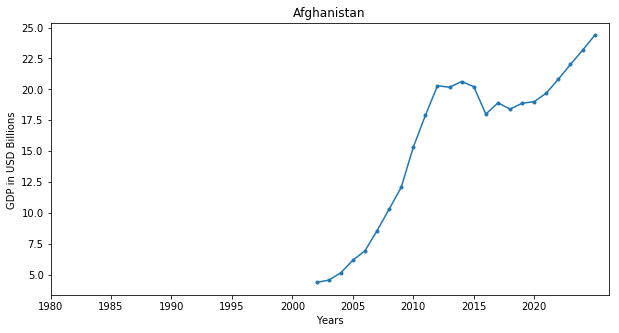

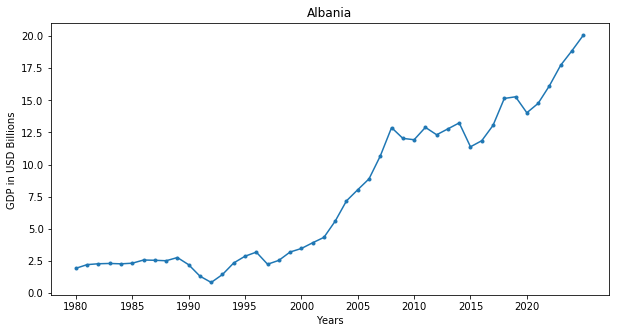

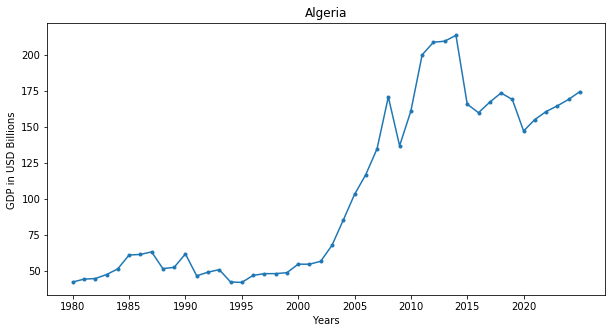

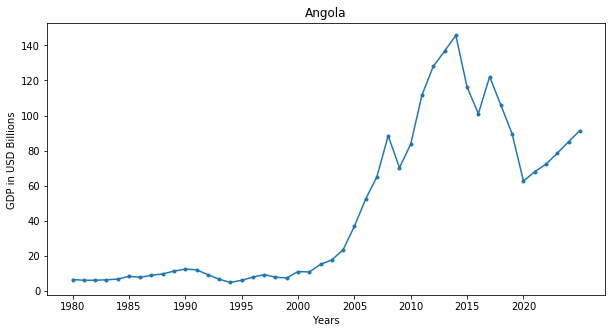

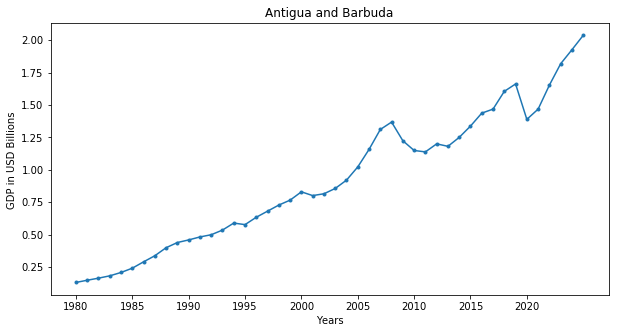

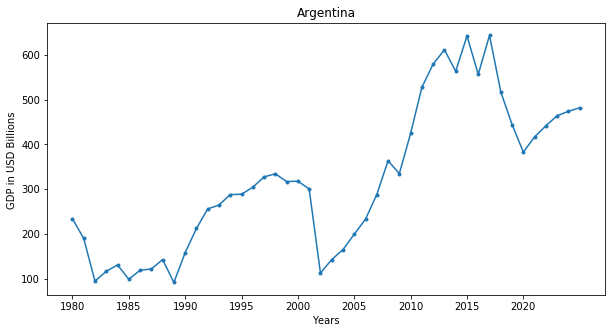

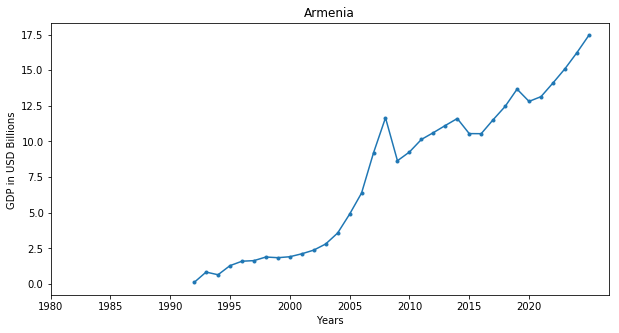

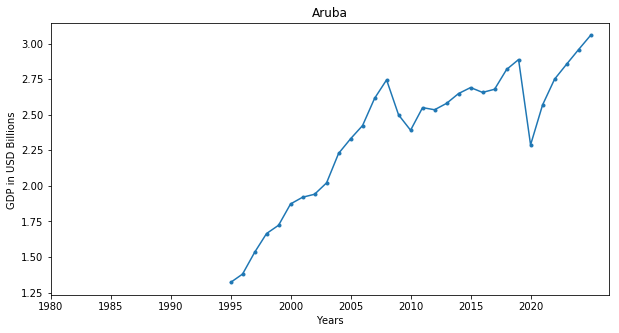

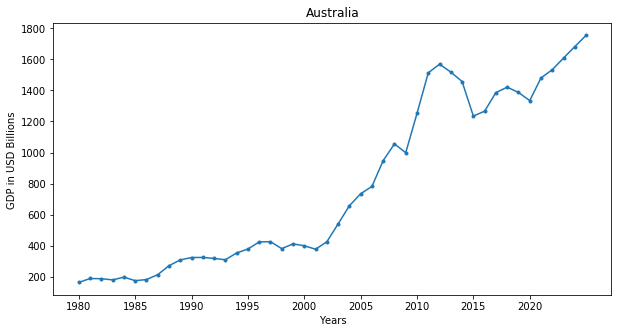

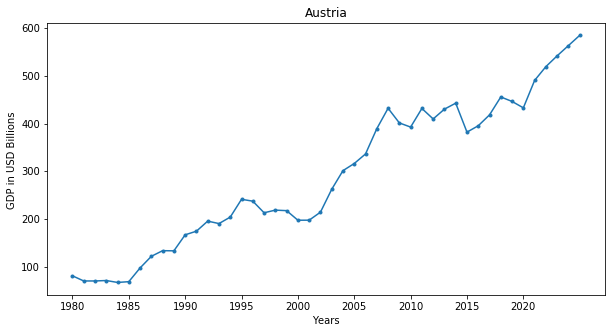

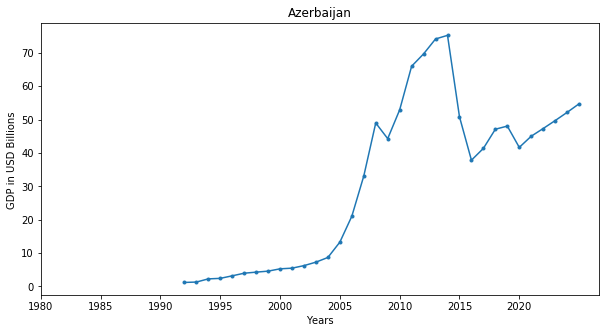

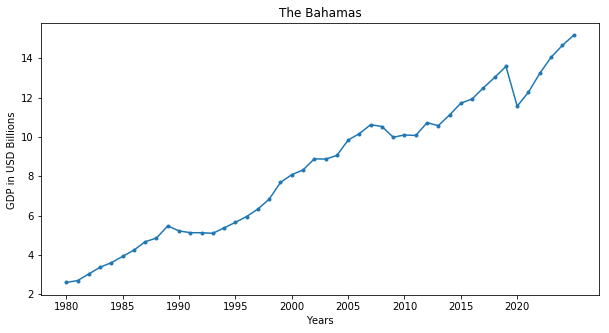

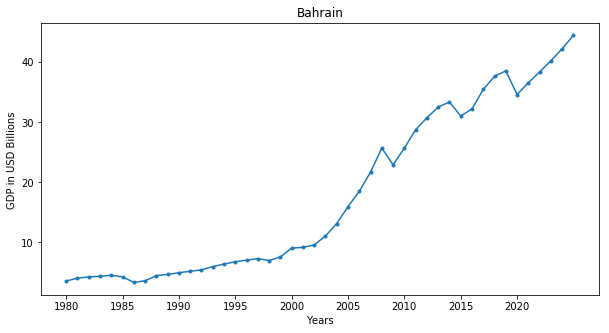

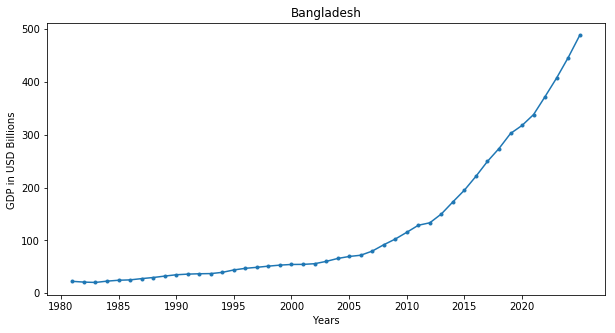

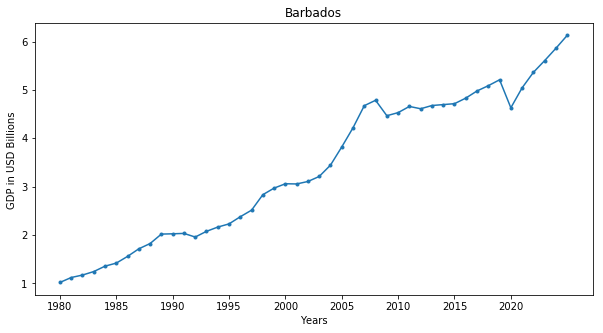

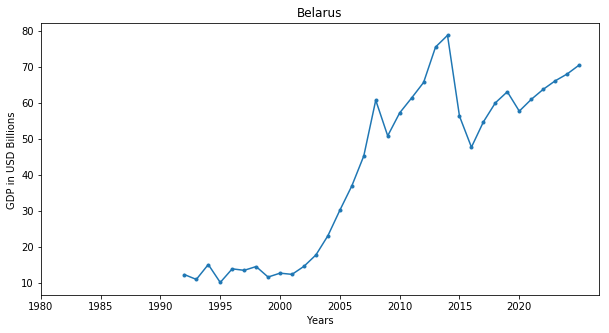

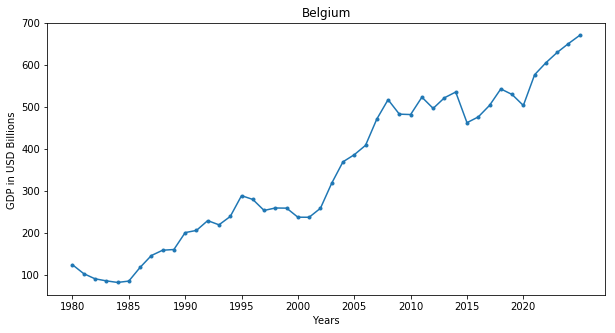

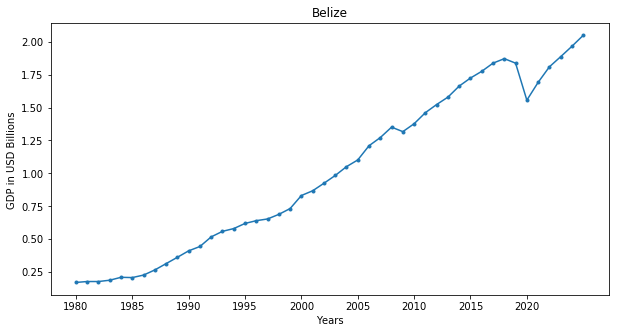

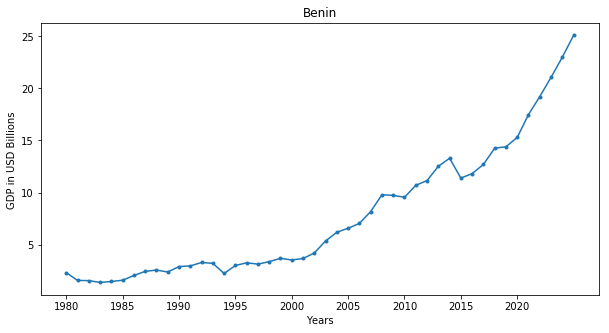

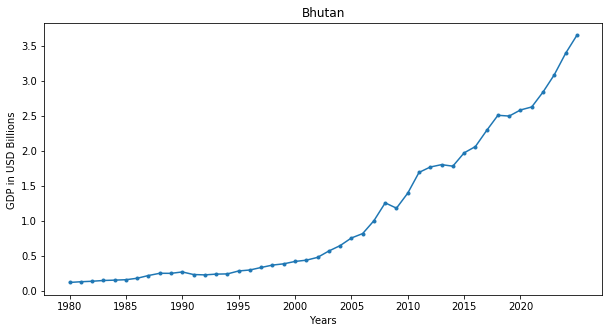

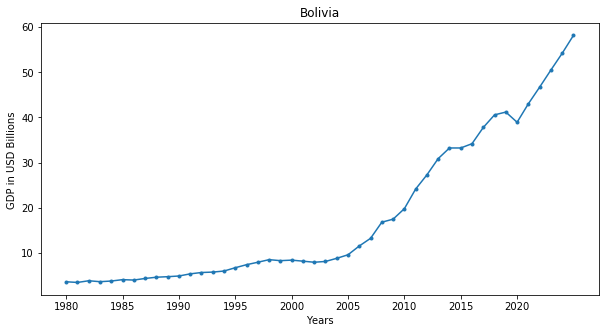

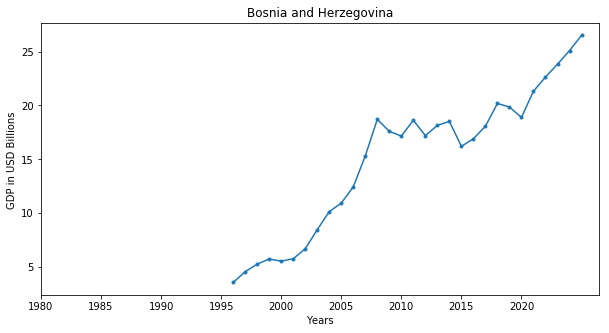

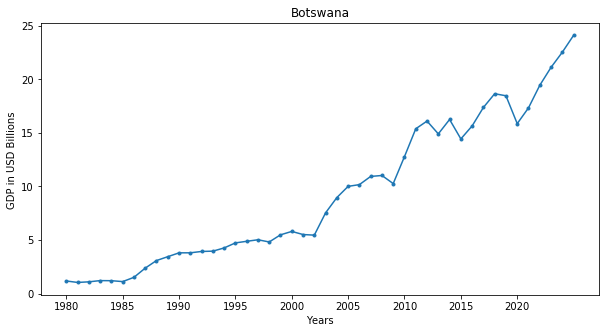

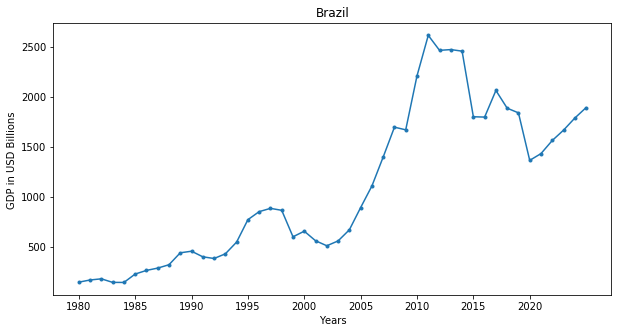

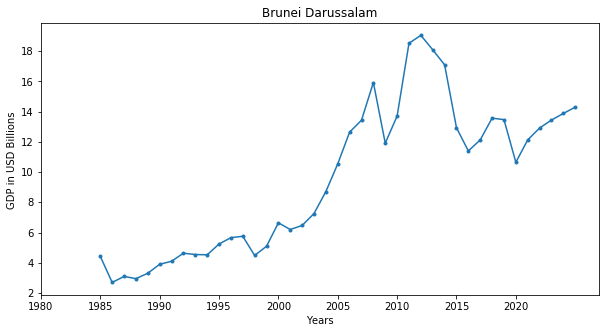

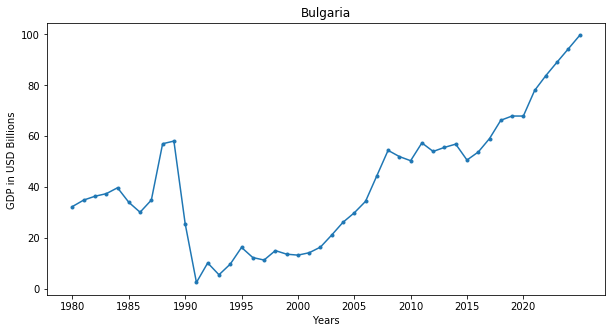

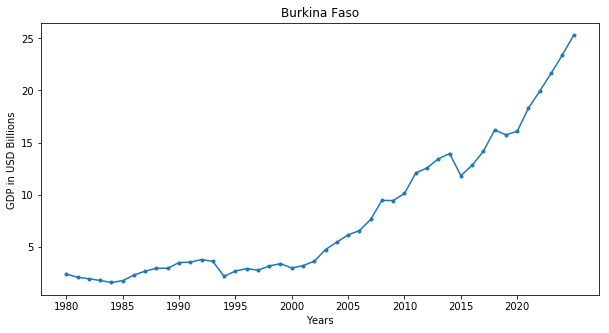

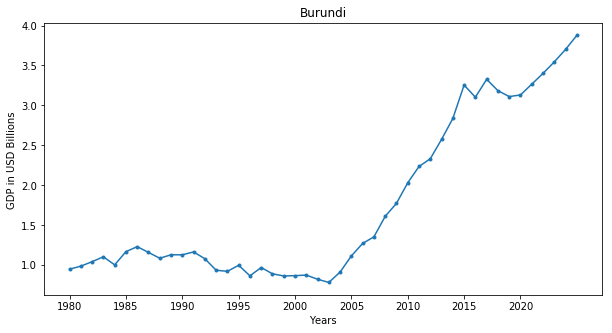

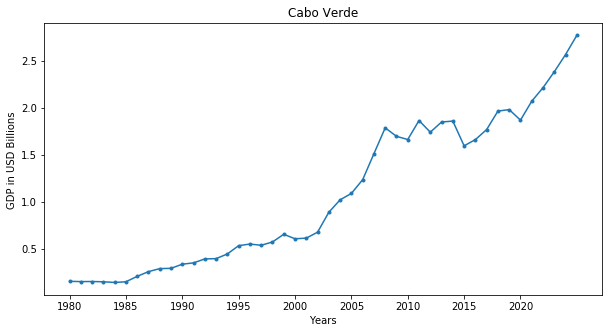

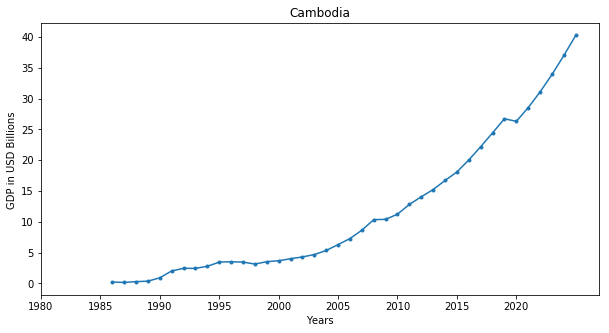

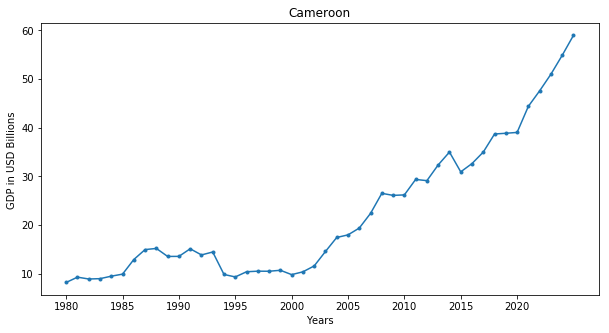

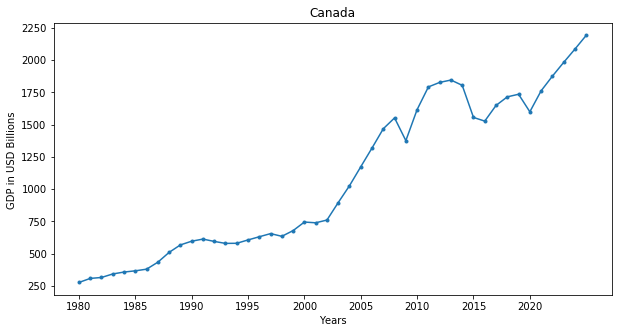

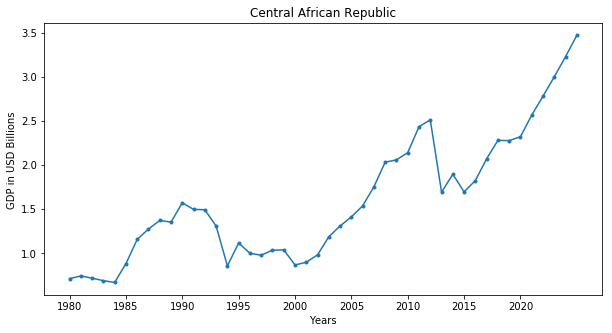

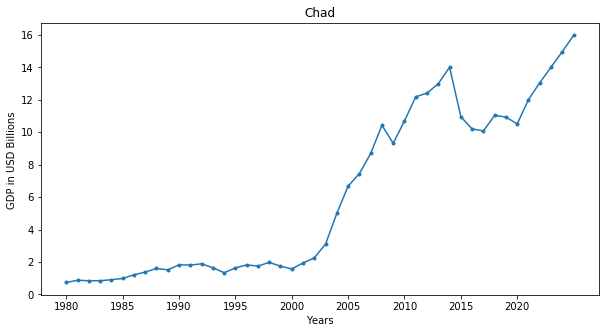

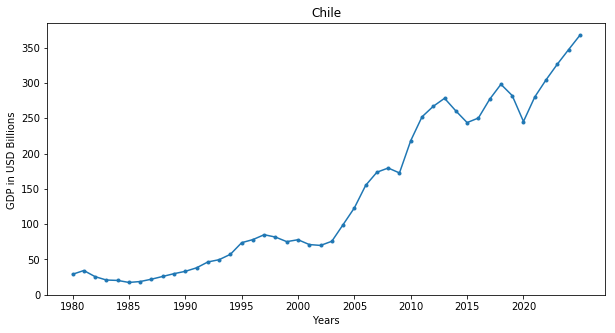

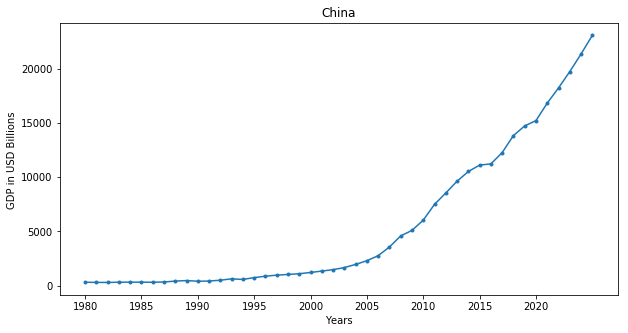

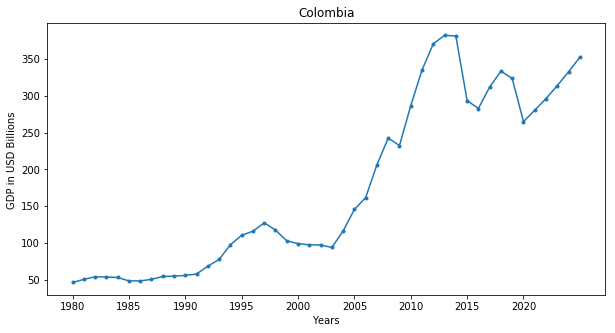

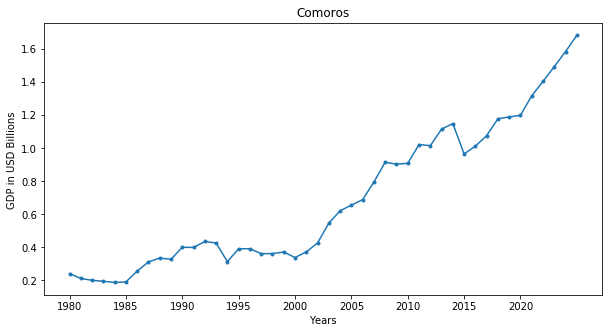

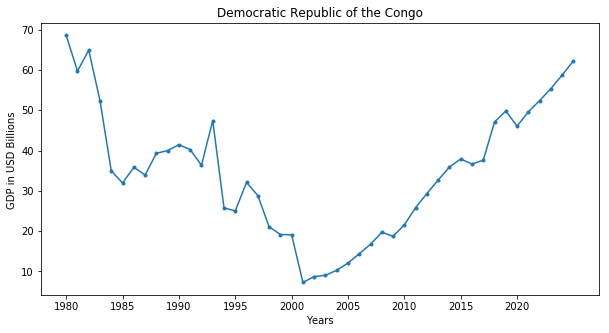

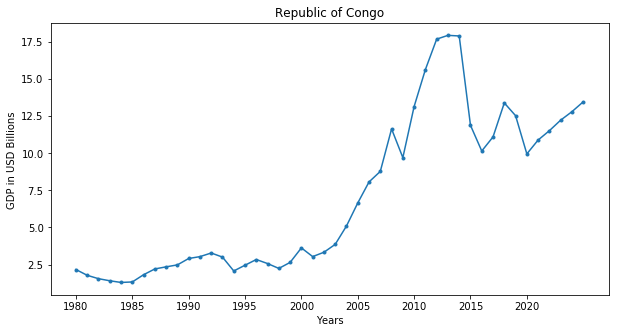

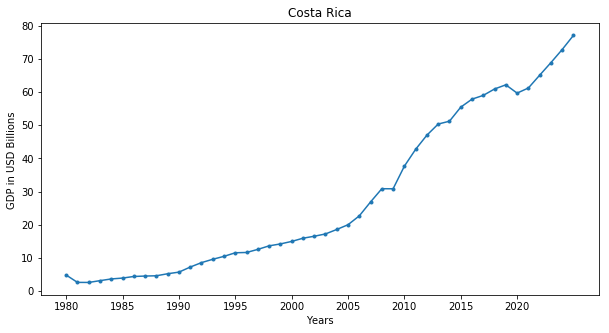

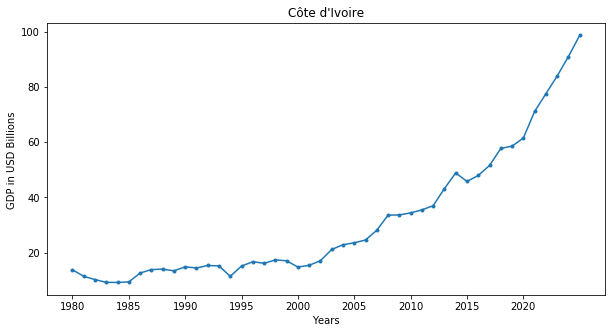

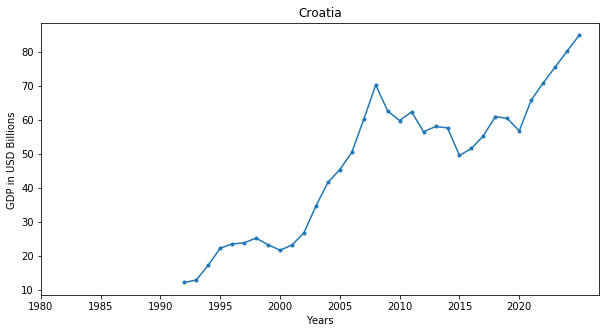

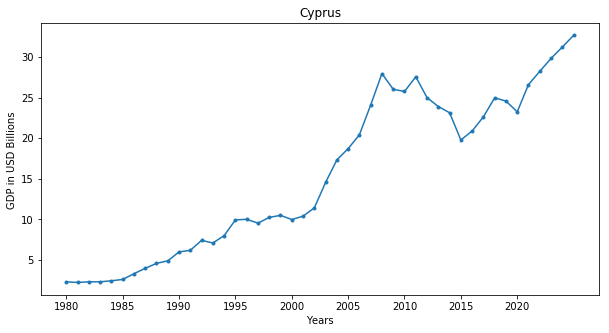

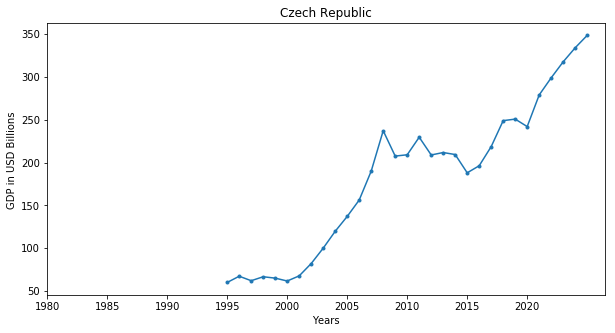

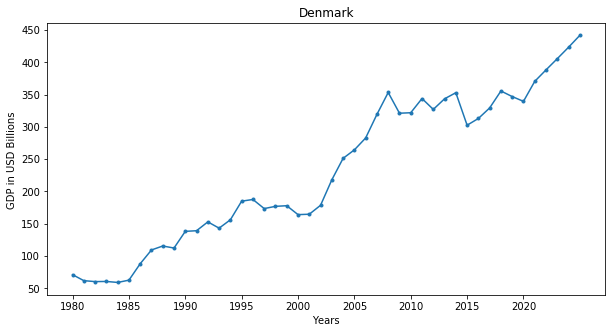

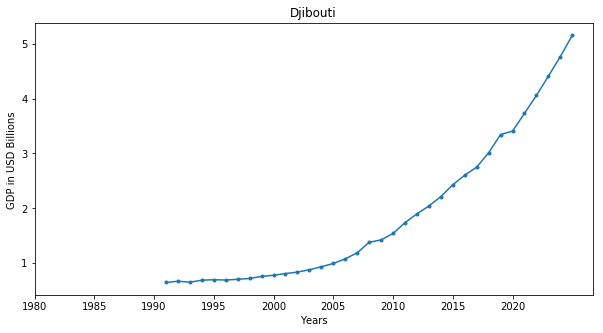

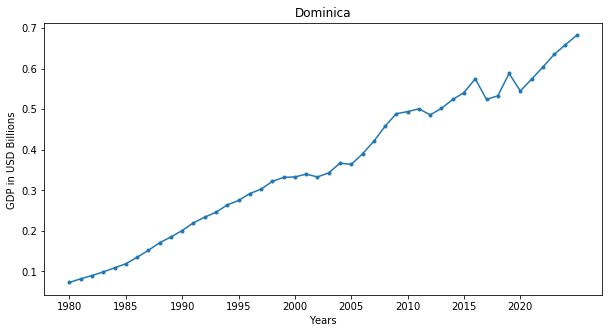

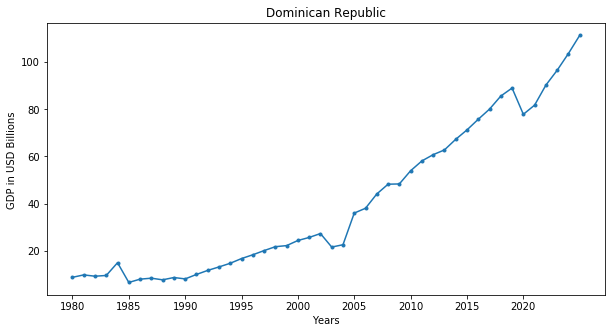

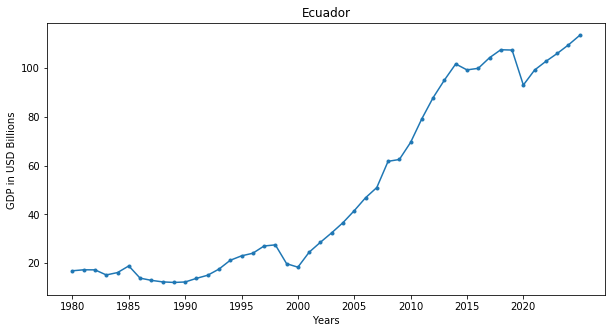

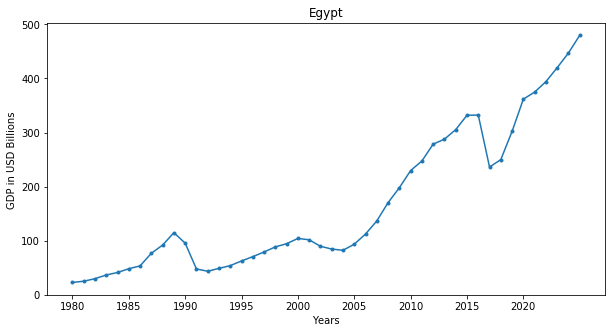

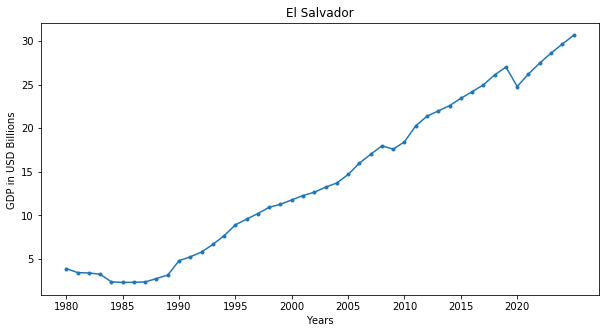

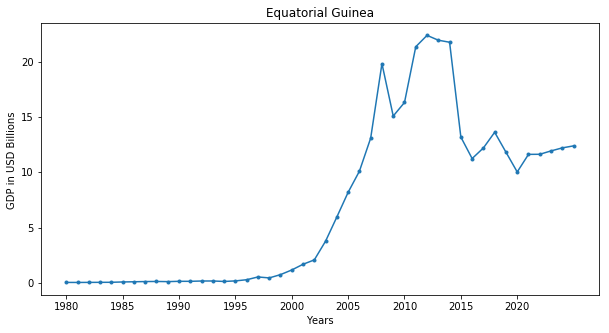

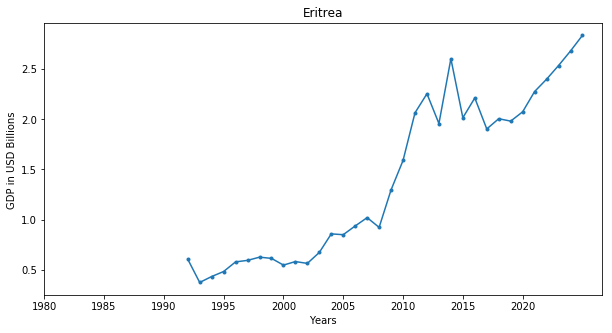

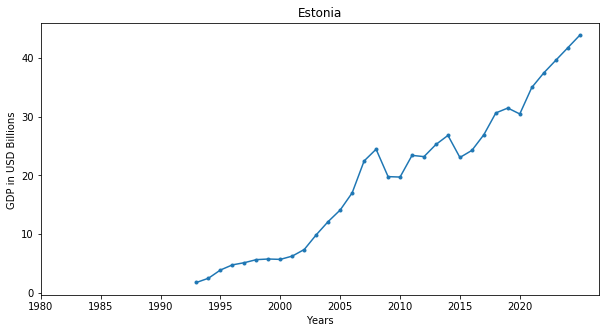

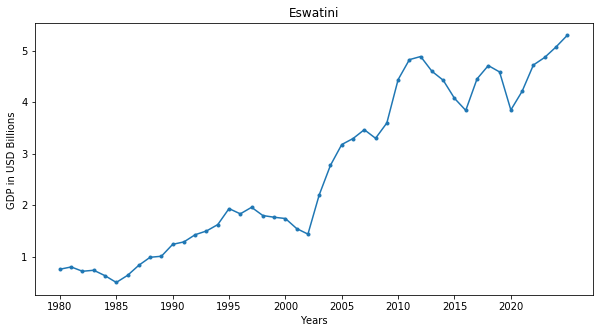

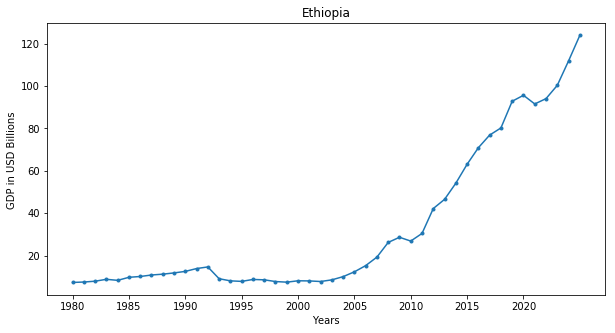

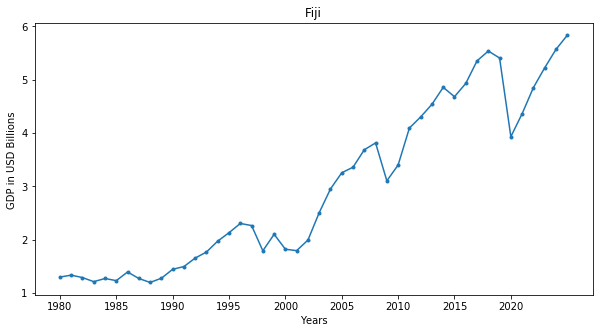

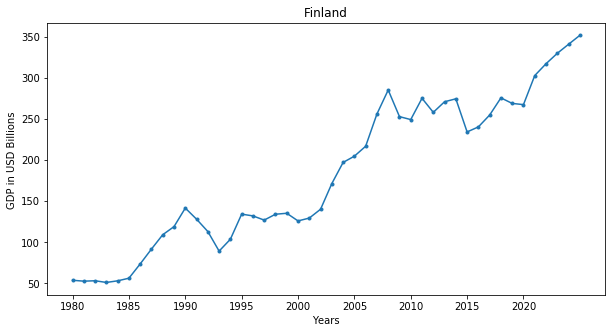

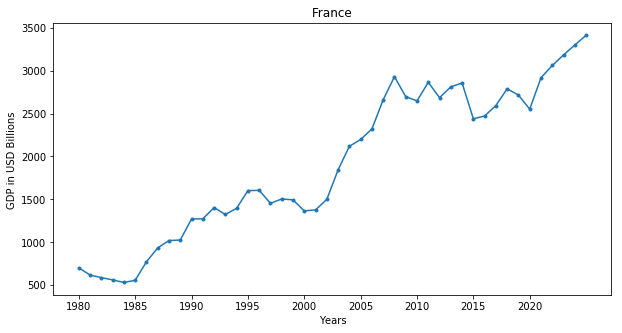

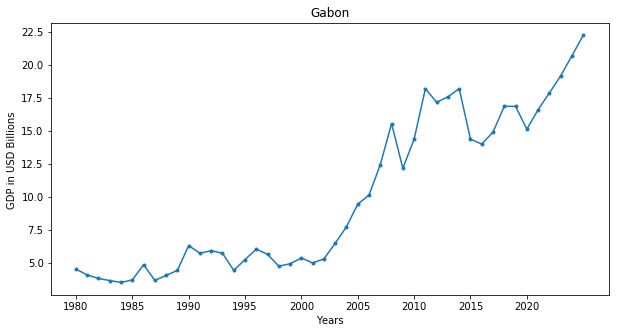

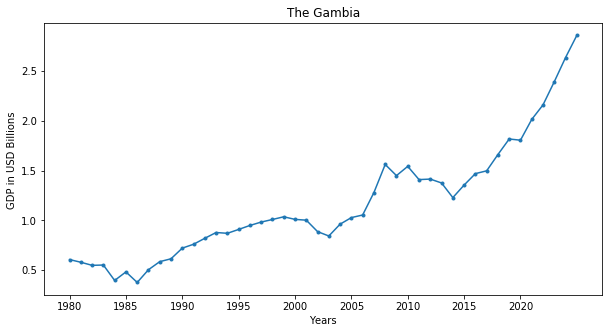

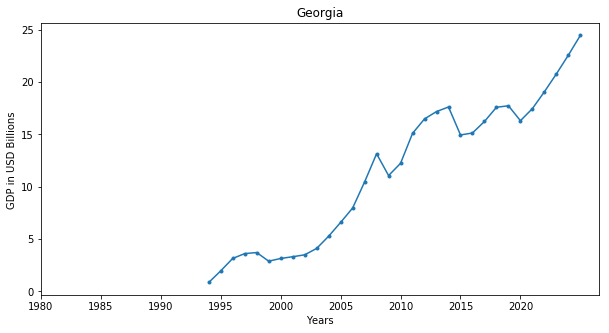

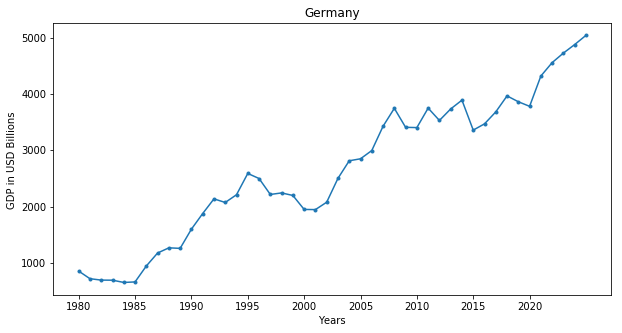

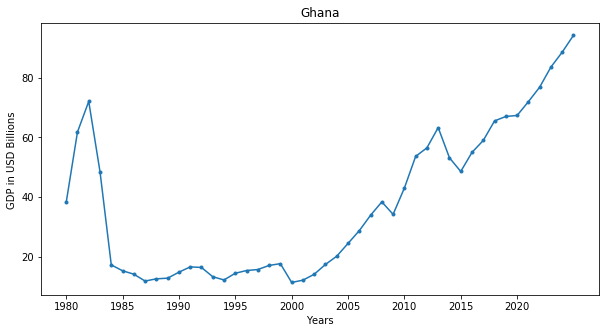

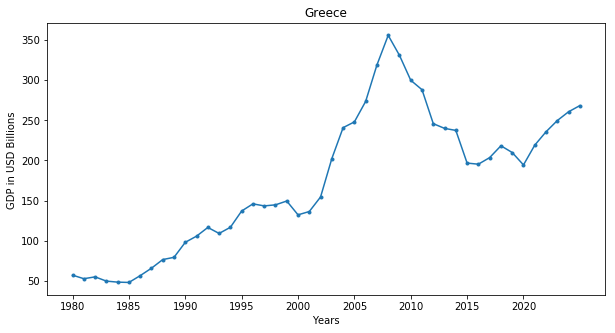

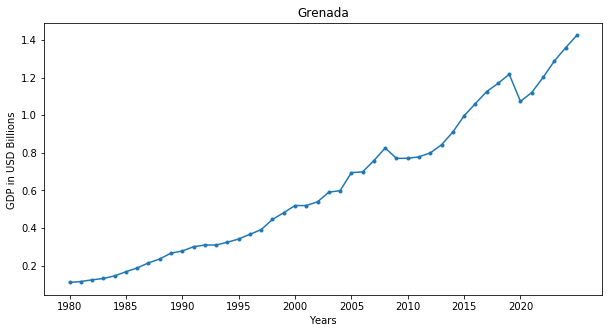

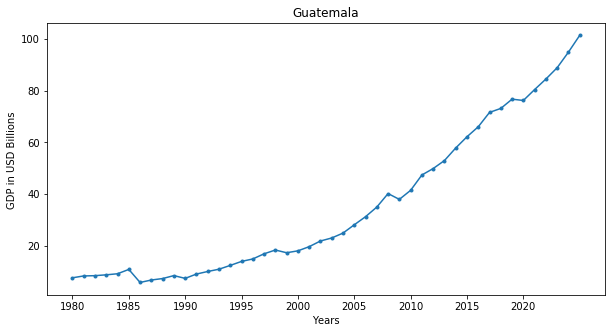

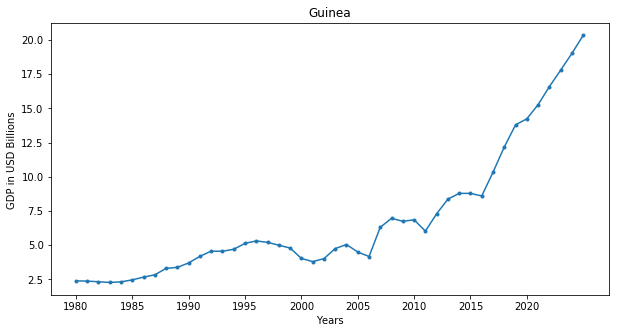

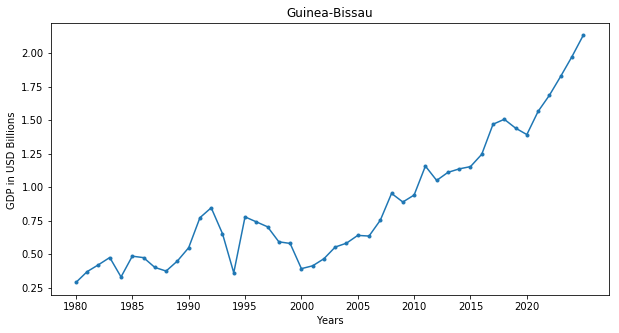

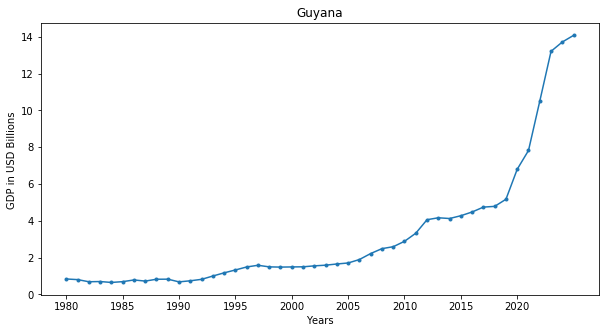

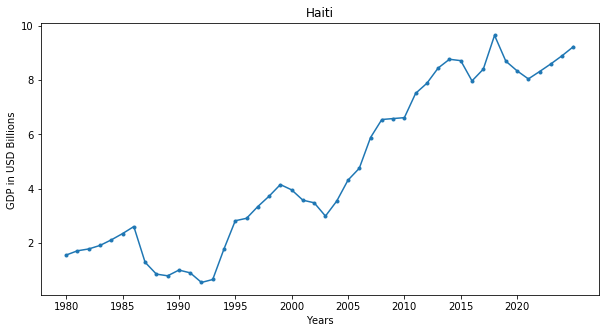

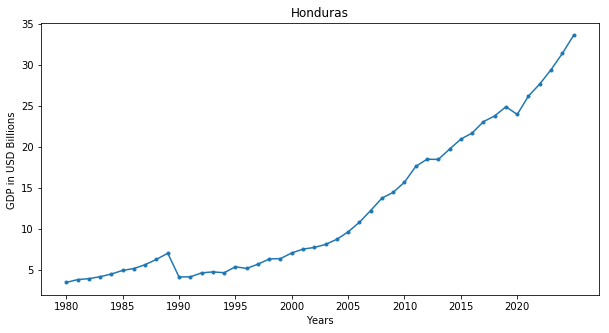

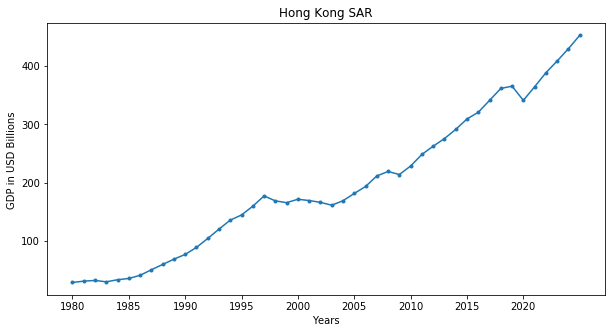

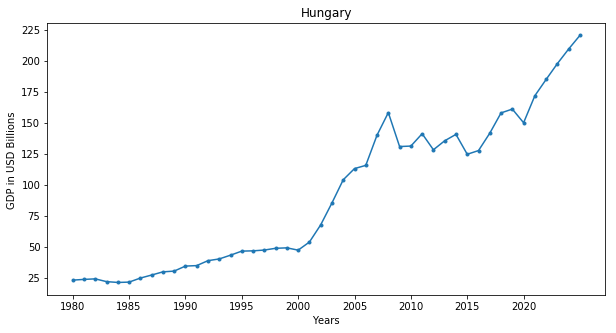

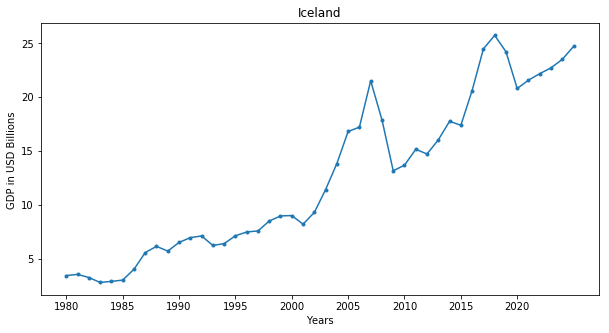

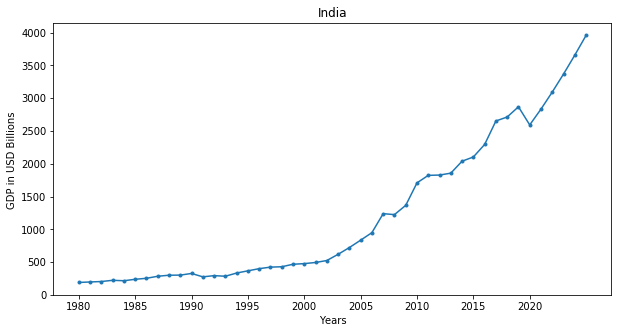

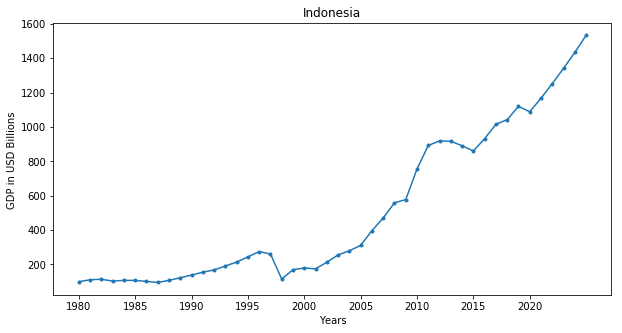

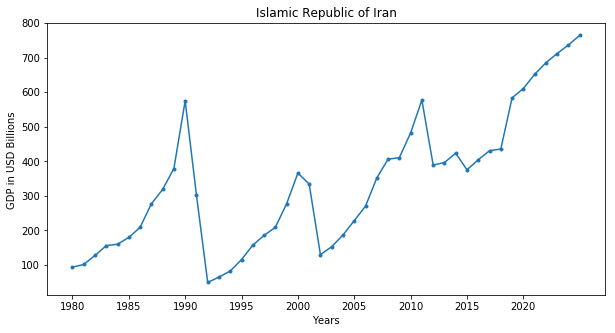

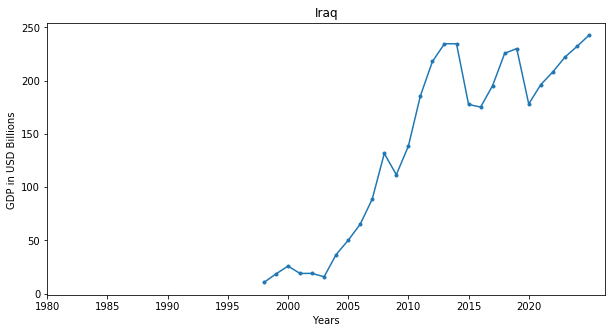

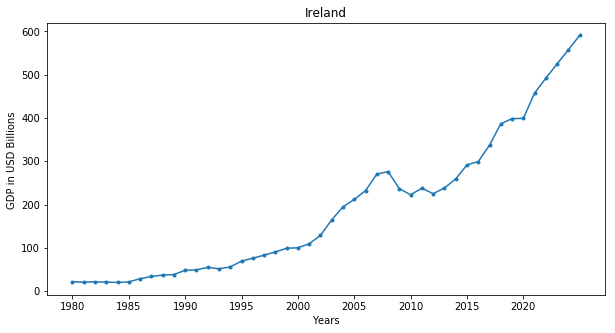

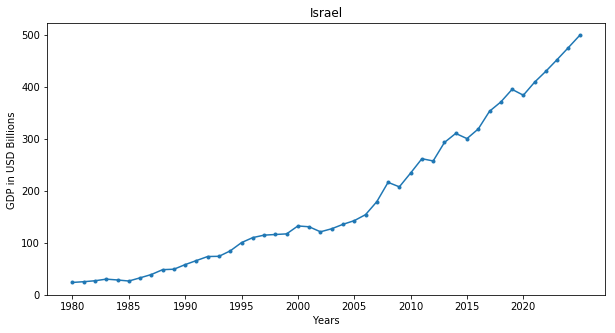

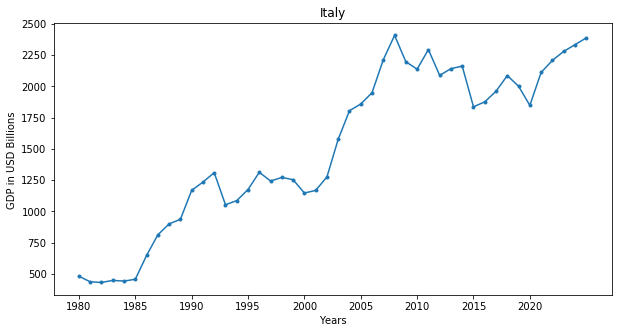

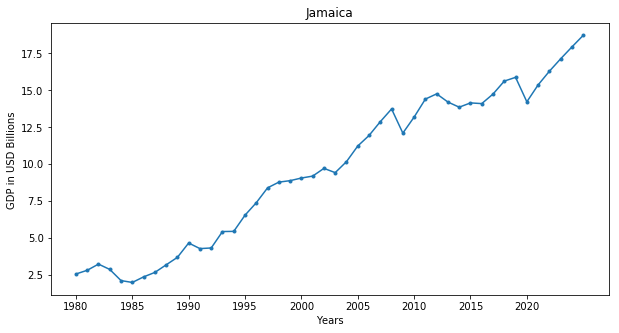

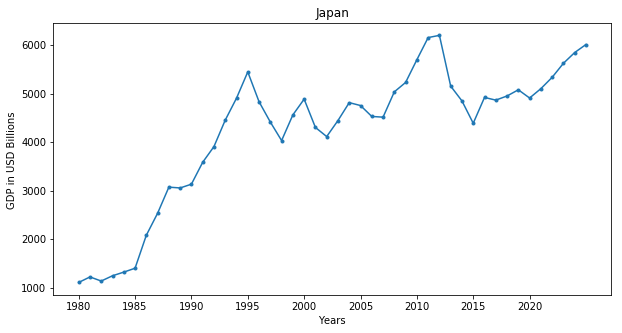

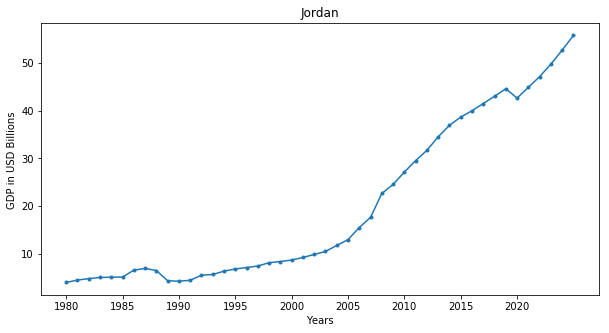

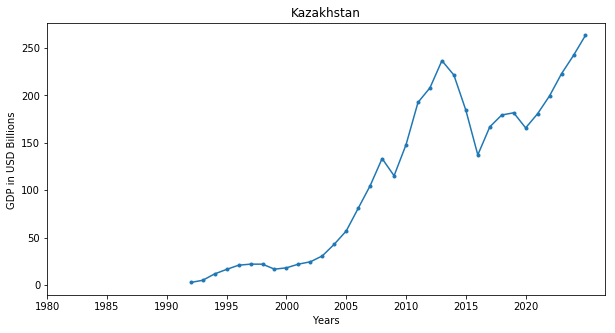

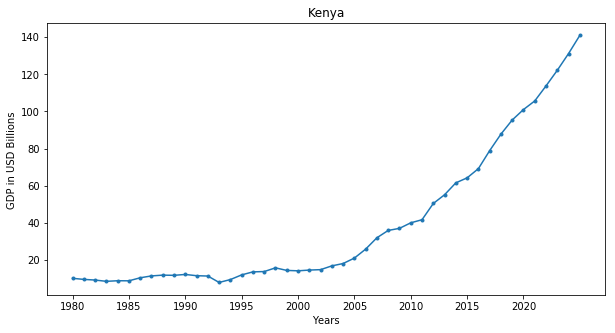

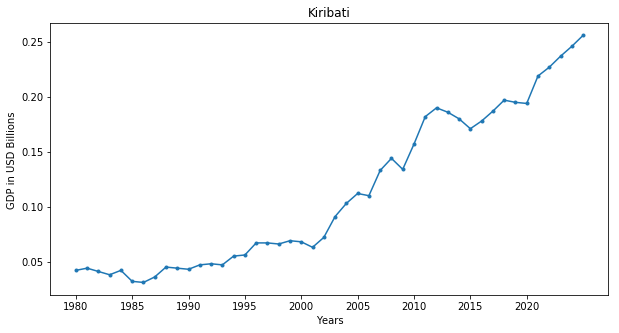

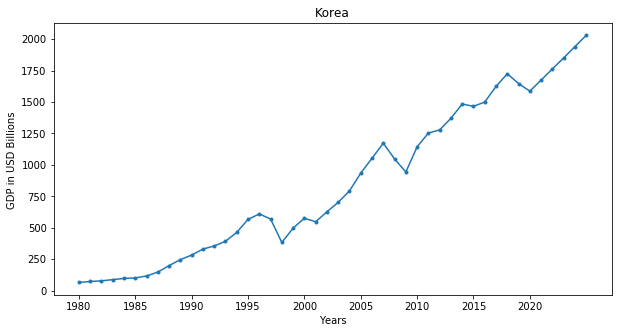

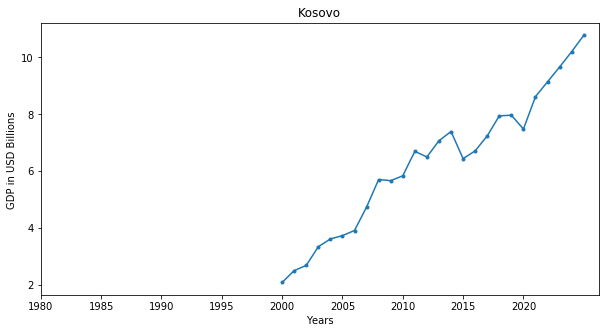

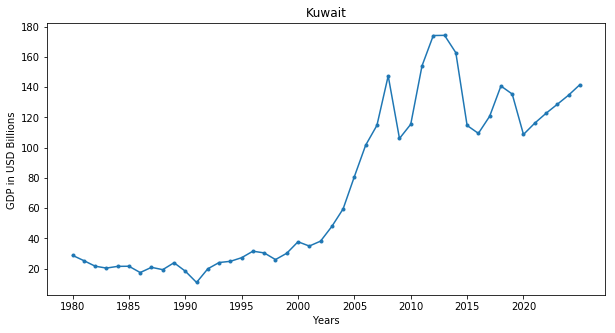

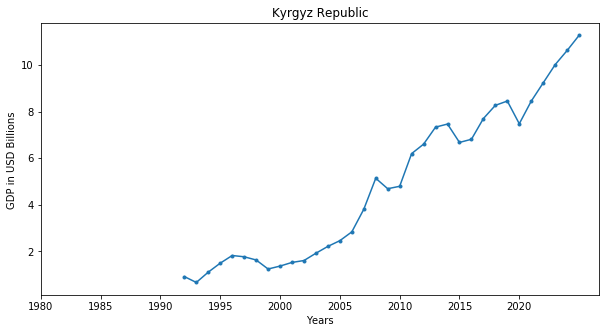

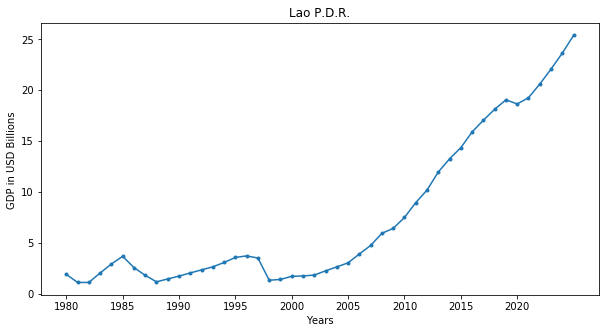

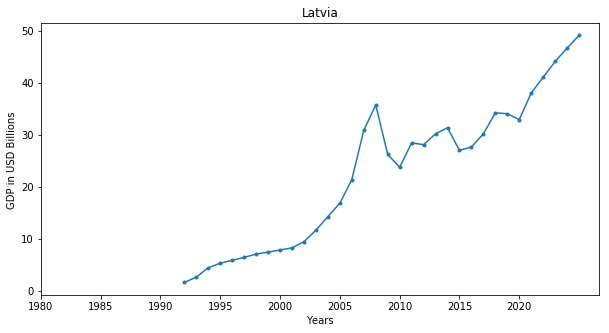

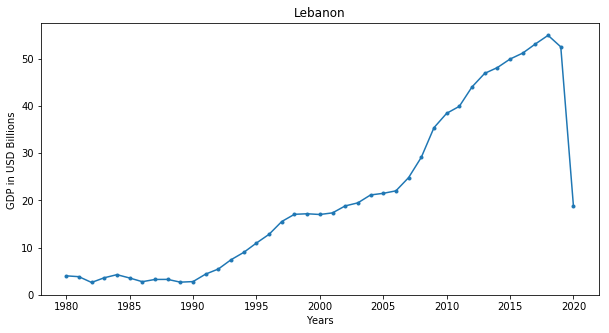

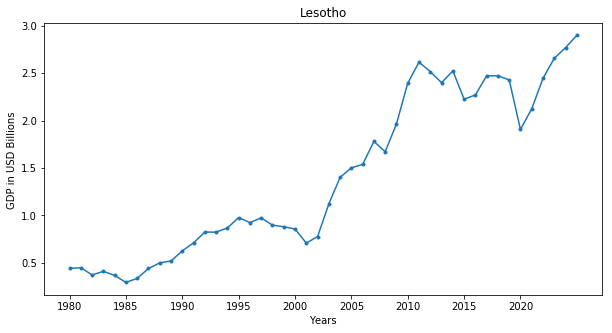

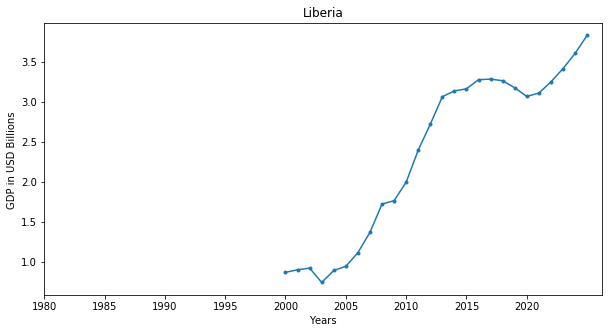

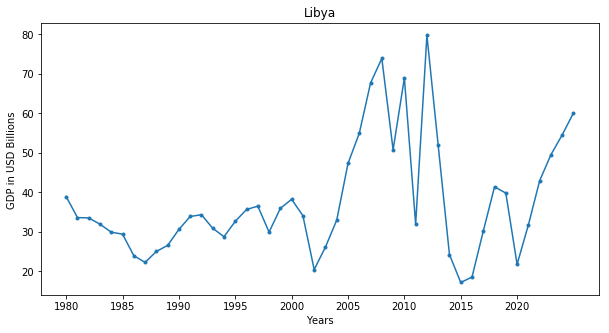

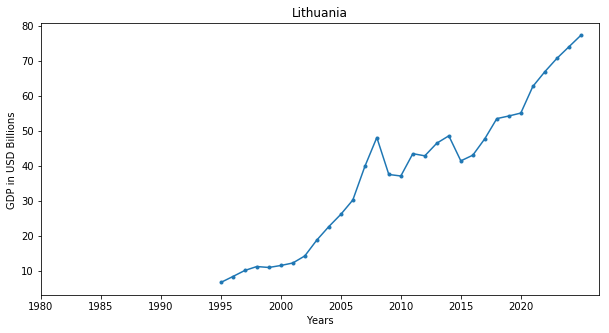

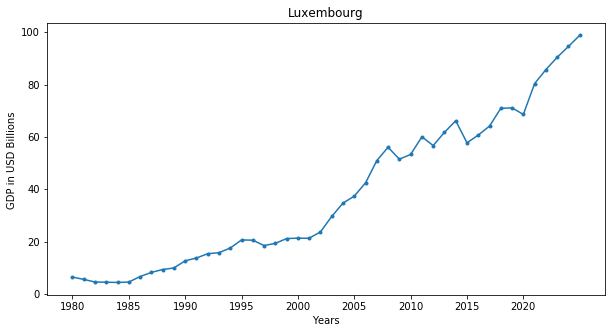

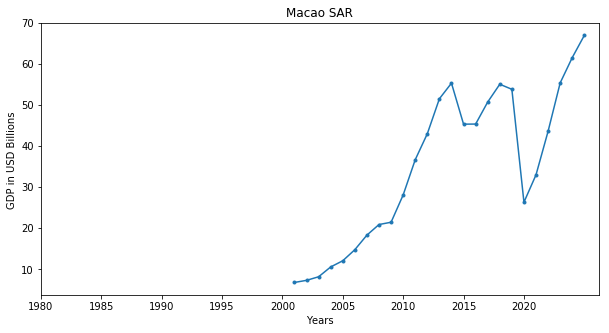

KeyboardInterrupt: 

<Figure size 720x360 with 0 Axes>

In [6]:
# Sukuriame nauja faila toje pacioje vietoje kur yra musu data:
if not os.path.exists(r'Countries_GDP'):
    os.makedirs(r'Countries_GDP')
    
# Indeksai saliu gdp
gdp_indeksas=df[df.WEO_Subject_Code=='NGDPD'].index 

# Plotinam ir isaugojam PNG tipu visu saliu GDP
for i in range(0,len(gdp_indeksas)):
    plt.figure(figsize=(10,5))
    plt.plot(df_years.index, df_years[gdp_indeksas[i]],'.-')
    plt.xticks(np.arange(0,max(df_years.index.astype(int))-min(df_years.index.astype(int)+1),5))
    plt.xlabel('Years')
    plt.ylabel('GDP in USD Billions ')
    plt.title(df.Country[gdp_indeksas[i]])
    plt.savefig('Countries_GDP/' +'{}_GDP.png'.format(df.Country[gdp_indeksas[i]]), bbox_inches='tight')
    plt.show()

# Suskirstymas saliu i 5 cluster pagal GDP ir "Volume of Exports of goods"
# Naudojame K-Means metoda

# Clusteriai GDP USD valiuta

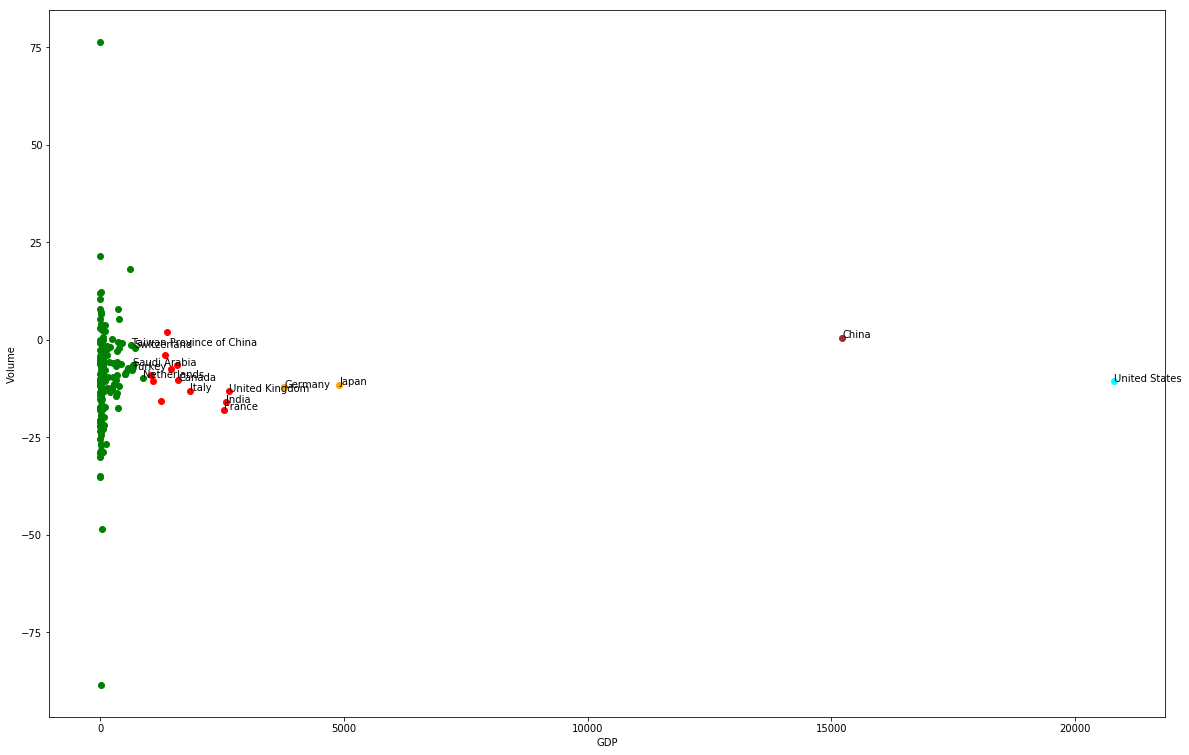

In [7]:
# Metai katru Clusterius prognozuosim
years = '2020'

# Susikuriame nauja DataFrame tik is Country,Volume,GDP per capita, kad galetume NaN eilutes panaikinti
df2=0
df2=df[df.WEO_Subject_Code=='TXG_RPCH'][['Country']].reset_index()[['Country']]
df2['Volume']=df[df.WEO_Subject_Code=='TXG_RPCH'][[years]].reset_index()[[years]]
df2['GDP']=df[df.WEO_Subject_Code=='NGDPD'][[years]].reset_index()[[years]]

# Panaikiname visas yra tusciu duomenu (NaN)
df2=df2[df2['Volume'].notna()]
df2=df2[df2['GDP'].notna()]

# Clusteriu kiekis
km = KMeans(n_clusters=5)
df20=[]
df21=[]
df22=[]
df23=[]
df24=[]

df2_clusters=[df20,df21,df22,df23,df24]   # Isskaidome i 5 clusterius
kiekis_max=5    # Kiekis didziausiu reiksmiu uzvadinamas kiekviename clusteryje 
col = ['green','cyan','red','brown','orange']  # Clusteriu spalvos

y_predicted = km.fit_predict(df2[['GDP','Volume']])
y_predicted
df2['cluster']=y_predicted


plt.figure(figsize=(20,13))
plt.xlabel('GDP')
plt.ylabel('Volume')

# Duomenis 
for i in range(len(df2_clusters)):
    df2_clusters[i]=df2[df2.cluster==i].sort_values(by='GDP', ascending = False)
    plt.scatter(df2_clusters[i].GDP,df2_clusters[i].Volume, color = col[i])
    for j in range(min(len(df2_clusters[i]),kiekis_max)):
        plt.annotate(df2_clusters[i]['Country'].iloc[j],
                     xy=(df2_clusters[i]['GDP'].iloc[j],df2_clusters[i]['Volume'].iloc[j]))

# Clusteriai GDP procentiniu pokyciu

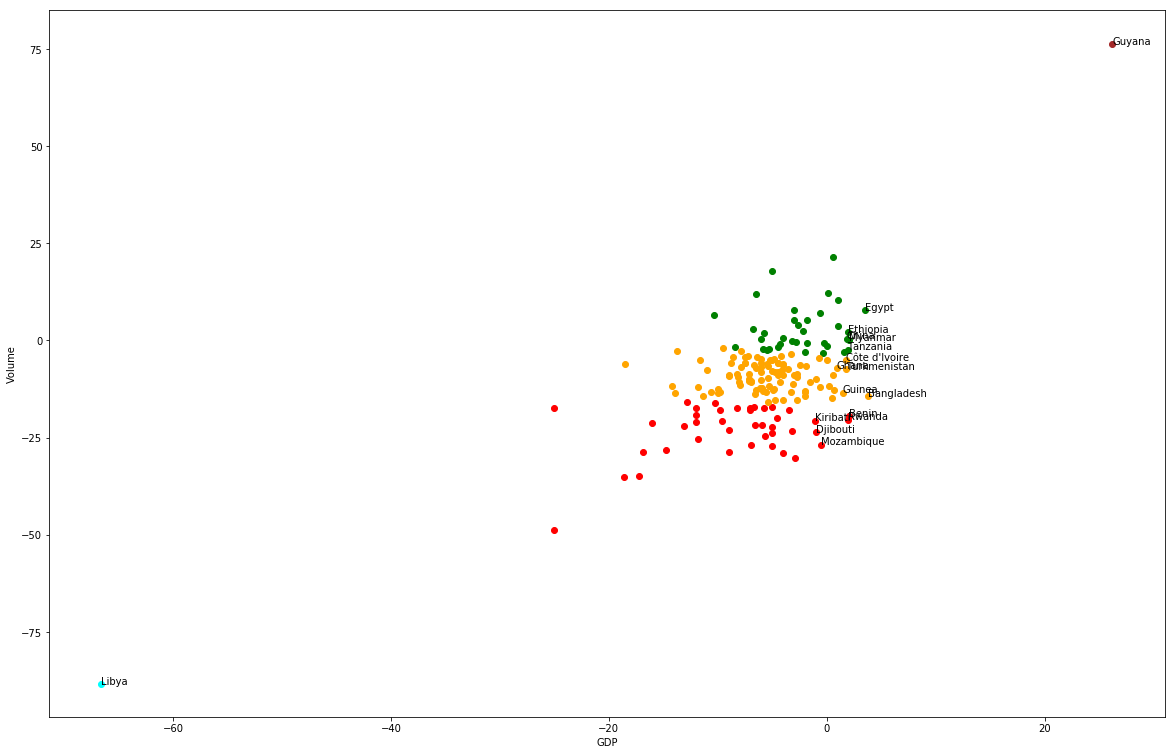

In [8]:
# Metai katru Clusterius prognozuosim
years = '2020'

# Susikuriame nauja DataFrame tik is Country,Volume,GDP per capita, kad galetume NaN eilutes panaikinti
df2=0
df2=df[df.WEO_Subject_Code=='TXG_RPCH'][['Country']].reset_index()[['Country']]
df2['Volume']=df[df.WEO_Subject_Code=='TXG_RPCH'][[years]].reset_index()[[years]]
df2['GDP']=df[df.WEO_Subject_Code=='NGDP_RPCH'][[years]].reset_index()[[years]]

# Panaikiname visas eilutes kur yra NaN
df2=df2[df2['Volume'].notna()]
df2=df2[df2['GDP'].notna()]

# Clusteriu kiekis
km = KMeans(n_clusters=5)

y_predicted = km.fit_predict(df2[['GDP','Volume']])
y_predicted
df2['cluster']=y_predicted

df20=[]
df21=[]
df22=[]
df23=[]
df24=[]
df2_clusters=[df20,df21,df22,df23,df24]   # Isskaidome i 5 clusterius
kiekis_max=5    # Kiekis didziausiu reiksmiu uzvadinamas kiekviename clusteryje 
col = ['green','cyan','red','brown','orange']  # Clusteriu spalvos

plt.figure(figsize=(20,13))
plt.xlabel('GDP')
plt.ylabel('Volume')

# Suskirstome clusterius i skirtingus df, kiekviena atvaizduojame uzvadinant 5 didziausias GDP reiksmes turincias salis clustery
for i in range(len(df2_clusters)):
    df2_clusters[i]=df2[df2.cluster==i].sort_values(by='GDP', ascending = False)
    plt.scatter(df2_clusters[i].GDP,df2_clusters[i].Volume, color = col[i])
    for j in range(min(len(df2_clusters[i]),kiekis_max)):
        plt.annotate(df2_clusters[i]['Country'].iloc[j],
                     xy=(df2_clusters[i]['GDP'].iloc[j],df2_clusters[i]['Volume'].iloc[j]))

plt.show()

# Metrics 2015 m. radimas, kurie yra kiekvienoje salyje

In [9]:

df_metrics=df
counter=Counter(df_metrics.WEO_Subject_Code[df_metrics['2015'].notna()])
c_max_index=[]

for value in counter:
    if counter[value]==len(df[df.WEO_Subject_Code=='NGDP'])-1:
        c_max_index.append(value)
print(f'Laukai esantys visose salyse 2015 metais: {c_max_index}')


Laukai esantys visose salyse 2015 metais: ['NGDP_R', 'NGDP_RPCH', 'NGDP', 'NGDPD', 'PPPGDP', 'NGDP_D', 'PPPEX', 'GGR', 'GGR_NGDP', 'NGDP_FY']
